### 导入必要的库

In [1]:
import numpy as np
import csv

### 从CSV中读入数据集并进行简单映射处理

In [2]:
raw_data_list = []
with open('train.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        raw_data_list.append(row)

raw_data_list.pop(0)

# 存储所有数据的矩阵
raw_data_matrix = np.zeros((len(raw_data_list[0]), len(raw_data_list)))
raw_data_list = np.array(raw_data_list).T
raw_data_matrix[0] = raw_data_list[0].astype(np.float)
for i in range(len(raw_data_matrix[0])):
    # male为1，female为0
    raw_data_matrix[1][i] = 1 if raw_data_list[1][i] == 'male' else 2
for i in range(2, 6):
    raw_data_matrix[i] = raw_data_list[i].astype(np.float)
for i in range(len(raw_data_matrix[0])):
    if raw_data_list[6][i] == 'U':
        raw_data_matrix[6][i] = 0
    elif raw_data_list[6][i] == 'C':
        raw_data_matrix[6][i] = 1
    elif raw_data_list[6][i] == 'Q':
        raw_data_matrix[6][i] = 2
    elif raw_data_list[6][i] == 'S':
        raw_data_matrix[6][i] = 3
raw_data_matrix[7] = raw_data_list[7].astype(np.float)

### 分割训练集和测试集

In [3]:
m_train = int(len(raw_data_matrix[0]) * 0.7)
m_test = len(raw_data_matrix[0]) - m_train

X_train = raw_data_matrix[0:7, 0:m_train]
Y_train = raw_data_matrix[7:8, 0:m_train]

X_test = raw_data_matrix[0:7, m_train:]
Y_test = raw_data_matrix[7:8, m_train:]

### 映射函数

将数值映射到0-1之间，直接使用Sigmoid容易溢出
$$
mapping(z) = 0.5(1+tanh(0.5z))
$$

In [4]:
def mapping(z):
    return 0.5 * (1 + np.tanh(0.5 * z))

### 初始化$\omega$和b

In [5]:
def initialize_with_zeros(dimension):
    w = np.zeros((dimension, 1))
    b = 0.
    return w, b

### 完成前向和反向传播

使用loss函数为

$$
\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}
$$

cost函数为

$$
J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})
$$

In [6]:
def propagate(w, b, X, Y, theta):
    m = X.shape[1]
    # 前向传播
    theta = 1e-5
    A = mapping((np.dot(w.T, X) + b ) * theta)
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    # 计算梯度，反向传播
    dw = 1 / m * np.dot(X, (A - Y).T) + theta
    db = 1 / m * np.sum(A - Y) + theta
    
    cost = np.squeeze(cost)
    
    grad = {
        "dw": dw,
        "db": db
    }
    return grad, cost

### 训练过程

In [7]:
def optimize(w, b, X, Y, num_iterations, learning_rate, theta):
    for i in range(num_iterations):
        grad, cost = propagate(w, b, X, Y, theta)
        
        dw = grad['dw']
        db = grad['db']
        
        # 更新w和b
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if (i+1)%5000 == 0:
            print('the cost of ' + str(i+1) + ' is: ' + str(cost))
        
    params = {
        "w": w,
        "b": b
    }
    return params

### 根据现有模型预测测试集并给出正确率

In [8]:
def predict(w, b, X, Y):
    Y_predict = mapping(np.dot(w.T, X) + b)
    for i in range(Y_predict.shape[1]):
        Y_predict[0][i] = 1 if Y_predict[0][i] >= 0.5 else 0
    return 100 - np.mean(np.abs(Y_predict - Y)) * 100

### 在数据集上运行

In [9]:
num_iterations = 100000
learning_rate = 20

w, b = initialize_with_zeros(X_train.shape[0])

params = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, np.exp(-18))

w = params["w"]
b = params["b"]

print('训练集准确率：' + str(predict(w, b, X_train, Y_train)) + '%')
print('测试集准确率：' + str(predict(w, b, X_test, Y_test)) + '%')

the cost of 5000 is: 0.6181512883382524
the cost of 10000 is: 0.6005865695959698
the cost of 15000 is: 0.5857476860023588
the cost of 20000 is: 0.5727183597330648
the cost of 25000 is: 0.5611769126825255
the cost of 30000 is: 0.5509198410148498
the cost of 35000 is: 0.541783693100303
the cost of 40000 is: 0.5336294510191016
the cost of 45000 is: 0.5263373205712376
the cost of 50000 is: 0.5198036432729547
the cost of 55000 is: 0.5139385186893266
the cost of 60000 is: 0.5086638367865486
the cost of 65000 is: 0.5039116168306629
the cost of 70000 is: 0.49962259480634114
the cost of 75000 is: 0.4957450179827053
the cost of 80000 is: 0.4922336142917224
the cost of 85000 is: 0.4890487101642322
the cost of 90000 is: 0.4861554748389653
the cost of 95000 is: 0.4835232725655959
the cost of 100000 is: 0.4811251068960491
训练集准确率：79.7752808988764%
测试集准确率：82.83582089552239%


以上使用TITANIC数据集，以下将使用自己生成的数据集进行验证

### 创建数据集

指定两个点，在周围分别使用高斯分布产生100个点

In [10]:
import random
import matplotlib.pyplot as plt

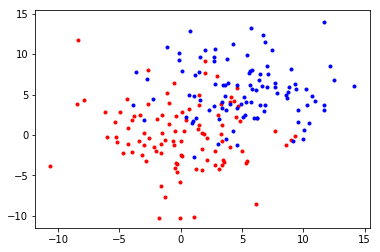

In [11]:
X0 = 0.0
Y0 = 0.0
X1 = 5.0
Y1 = 5.0

XG_Raw = np.zeros((2, 200))
YG_Raw = np.zeros((1, 200))

for i in range(100):
    XG_Raw[0, i] = X0 + random.gauss(0, 4)
    XG_Raw[1, i] = Y0 + random.gauss(0, 4)
    YG_Raw[0, i] = 0
for i in range(100, 200):
    XG_Raw[0, i] = X1 + random.gauss(0, 4)
    XG_Raw[1, i] = Y1 + random.gauss(0, 4)
    YG_Raw[0, i] = 1

plt.scatter(XG_Raw[0,0:100], XG_Raw[1,0:100], c='r', marker='.')
plt.scatter(XG_Raw[0,100:200], XG_Raw[1,100:200], c='b', marker='.')
plt.show()

### 产生训练集和测试集

In [12]:
XG_Train = np.r_[XG_Raw[0:2,0:70], XG_Raw[0:2,100:170]]
YG_Train = np.r_[YG_Raw[0:1,0:70], YG_Raw[0:1,100:170]]
XG_Test = np.r_[XG_Raw[0:2,70:100], XG_Raw[0:2,170:200]]
YG_Test = np.r_[YG_Raw[0:1,70:100], YG_Raw[0:1,170:200]]

### 带入算法

In [13]:
w, b = initialize_with_zeros(XG_Train.shape[0])
params = optimize(w, b, XG_Train, YG_Train, 100000, 0.5, np.exp(-18))
w = params["w"]
b = params["b"]

print('训练集准确率：' + str(predict(w, b, XG_Train, YG_Train)) + '%')
print('测试集准确率：' + str(predict(w, b, XG_Test, YG_Test)) + '%')

the cost of 5000 is: 0.9428409375305934
the cost of 10000 is: 0.722160596942813
the cost of 15000 is: 0.5961068774228621
the cost of 20000 is: 0.5155744595344697
the cost of 25000 is: 0.45980334361698355
the cost of 30000 is: 0.4188569310260107
the cost of 35000 is: 0.38745788484286703
the cost of 40000 is: 0.3625632385447668
the cost of 45000 is: 0.3423004625639791
the cost of 50000 is: 0.32545552825399526
the cost of 55000 is: 0.31120709842022853
the cost of 60000 is: 0.2989795503786742
the cost of 65000 is: 0.2883573242930281
the cost of 70000 is: 0.279032746438698
the cost of 75000 is: 0.2707730185885417
the cost of 80000 is: 0.26339864036705873
the cost of 85000 is: 0.25676889843927664
the cost of 90000 is: 0.25077186172138666
the cost of 95000 is: 0.24531732957491878
the cost of 100000 is: 0.24033176284969848
训练集准确率：97.14285714285714%
测试集准确率：100.0%
